# Exploratory Data Analysis

Suppose that we want to fit a linear regression to predict attendance using the following predictors: <br> <br>
**game_type** — is the game during the day or at night<br>
**day_of_week** — what day of the week did the game occur<br>
**temperature** — average game temperature (Fahrenheit)<br>
**sky** — description of sky condition at the time of the game<br>
**total_runs** — total runs scored in the game<br>

Through EDA, we’ll want to investigate:<br>
- the data type of each variable
- whether there is missing data and how it is coded
- how discrete/categorical data is coded (and whether we need to make any changes)
- how the data are scaled (and whether we need to make any changes)
- whether there are outliers
- the distributions of continuous features
- the relationships between pairs of features

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# import dataset downloaded from Kaggle (https://www.kaggle.com/cyaris/2016-mlb-season)
bb = pd.read_csv('baseball_reference_2016_clean.csv')

# select a subset of dataset
bb = bb[['game_type','day_of_week','temperature','sky','total_runs', 'attendance']]

## Preview the dataset

In [22]:
bb.head()

,game_type,day_of_week,temperature,sky,total_runs,attendance
0,Night Game,Sunday,74.0,Sunny,7,40030.0
1,Night Game,Wednesday,55.0,Overcast,5,21621.0
2,Night Game,Wednesday,48.0,Unknown,6,12622.0
3,Night Game,Wednesday,65.0,Cloudy,4,18531.0
4,Day Game,Wednesday,77.0,In Dome,7,18572.0


In [23]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_type    2463 non-null   object 
 1   day_of_week  2463 non-null   object 
 2   temperature  2463 non-null   float64
 3   sky          2463 non-null   object 
 4   total_runs   2463 non-null   int64  
 5   attendance   2460 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 115.6+ KB


## Data types

- **Categorical**
    - Ordinal categorical variables: categories mantain an order
         - dtype = string *or* int
    - Nominal categorical variables: categories with no order
         - dtype = string
    - Binary categorical varaibles: nominal variables with two categories
         - dtype = bool *or* int *or* str
- **Quantitative**
    - Discrete: numbered values that can only take certain values
         - dtype = int
    - Continuous: numbered values that are measured, and can be any number within a particular range
         - dtype = float

In [24]:
bb.dtypes

game_type       object
day_of_week     object
temperature    float64
sky             object
total_runs       int64
attendance     float64
dtype: object

If variables that are expected to be floats or ints are objects, this indicates that there is at least one character in the columns which are preventing the variable from being read as a numeric data type. This could be either an input mistake (such as the letter “o” in place of a “0”), or it can be an indication of how missing data were handled.

In [25]:
# sample code to change data type
bb['game_type'] = bb['game_type'].astype('object')

## Missing data

Depending on the analysis being performed, observations with missing values will either:
- remain as-is
- be removed
- be replaced with an imputed value
- be replaced with missing data type that Python can recognize, such as NaN.

Inspect variables to ensure that zero values are supposed to be zeros. It's possible that some zero values are supposed to be NaN, and could skew the analysis if they remain as zeros.

In [26]:
# can inspect quantitative variables to see if there are any unusual values using .unique()
bb['temperature'].unique()

array([ 74.,  55.,  48.,  65.,  77.,  81.,  72.,  70.,  40.,  36.,  64.,
        57.,  66.,  63.,  42.,  73.,  56.,  75.,  45.,  68.,  69.,  80.,
        67.,  78.,  58.,  82.,  59.,  50.,  61.,  76.,  51.,  71.,  44.,
        49.,  84.,  60.,  53.,  62.,  54.,  83.,  85.,  79.,  87.,  89.,
        90.,  93.,  95.,  97.,  88.,  86.,  91.,  94.,  92.,  43.,  96.,
        99.,  98., 100.,  52., 101.,  47.,  41.,  31.,  38.,  32.,  39.,
        34.])

In [27]:
# sample code to replace non number values
non_numbers = ['N','-','X']

for x in non_numbers:
    bb = bb.replace(x,'NaN')

## Categorical encoding

Categorical features with many levels are “expensive” to include in a regression model (we need to calculate a separate slope for each level). We may want to consider:
- deleting the records of data with only a few observation
- combining categories with few observations into larger categories of related variables

Categorical variables can be inspected using **.value_counts()**

In [28]:
bb['game_type'].value_counts(dropna=False)

Night Game    1664
Day Game       799
Name: game_type, dtype: int64

## Label Encoding

Some variables could be coded differently depending on the trends in the data and the goals for the analysis.

For example - the day_of_week variable could be coded as:
- if attendance increases approximately linearly throughout the week, day_of_week could be ordinal.
- if attendance goes up and down throughout the week, day_of_week could be nominal.
- if games on Friday-Sunday have higher attendance than other days of the week, day_of_week could be coded to only have two levels: weekend and weekday. 

The distribution of values within a categories can be inspected using boxplots.

Text(0.5, 1.0, 'Attendance by Day of Week')

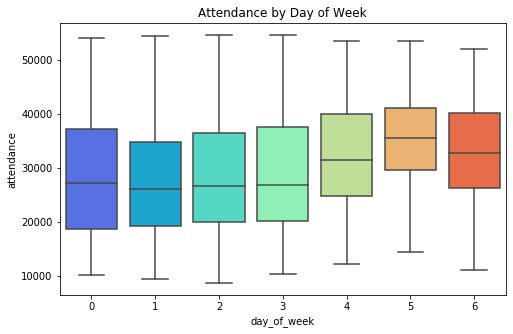

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day_of_week',y='attendance',data=bb, palette='rainbow')
plt.title("Attendance by Day of Week")

### Encoding nominal categorical variables

The pandas **.Categorical()** method can be used to store data as type category and indicate the order of the categories.

In [29]:
# order ordinal categorical variables using pd.Categorical
bb['day_of_week'] = pd.Categorical(bb['day_of_week'], ['Monday', 
                                                       'Tuesday', 
                                                       'Wednesday', 
                                                       'Thursday',
                                                       'Friday',
                                                       'Saturday',
                                                       'Sunday'], ordered=True)

bb['day_of_week'].unique()

[Sunday, Wednesday, Tuesday, Monday, Thursday, Saturday, Friday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

### Label Encoding
Label encoding is when each category in a variable is converted to an integer. This enables us to perform numerical operations on the column and widen our range of plotting capabilities.

In [30]:
bb['day_of_week_codes'] = bb['day_of_week'].cat.codes

bb.head()

,game_type,day_of_week,temperature,sky,total_runs,attendance,day_of_week_codes
0,Night Game,Sunday,74.0,Sunny,7,40030.0,6
1,Night Game,Wednesday,55.0,Overcast,5,21621.0,2
2,Night Game,Wednesday,48.0,Unknown,6,12622.0,2
3,Night Game,Wednesday,65.0,Cloudy,4,18531.0,2
4,Day Game,Wednesday,77.0,In Dome,7,18572.0,2


### One-Hot Encoding
One-hot encoding creates a new binary variable for each of the categories within our original variable. This technique is useful when managing nominal variables because it encodes the variable without creating an order among the categories.
- Use cases:
    - Nominal categorical variable where it doesn’t make sense to assign numbers to our categories, as this could create an order among the species that is not present (i.e dog breeds, eye color, country).
    - We don't want to assume equal spacing between categories in an ordinal categorical variable.

In [31]:
bb = pd.get_dummies(data=bb, columns=['sky'])

bb.head()

,game_type,day_of_week,temperature,total_runs,attendance,day_of_week_codes,sky_Cloudy,sky_Drizzle,sky_In Dome,sky_Night,sky_Overcast,sky_Rain,sky_Sunny,sky_Unknown
0,Night Game,Sunday,74.0,7,40030.0,6,0,0,0,0,0,0,1,0
1,Night Game,Wednesday,55.0,5,21621.0,2,0,0,0,0,1,0,0,0
2,Night Game,Wednesday,48.0,6,12622.0,2,0,0,0,0,0,0,0,1
3,Night Game,Wednesday,65.0,4,18531.0,2,1,0,0,0,0,0,0,0
4,Day Game,Wednesday,77.0,7,18572.0,2,0,0,1,0,0,0,0,0


In [13]:
bb['sky'].value_counts(dropna=False)

Cloudy      761
Sunny       745
Unknown     402
In Dome     356
Overcast    159
Drizzle      16
Night        12
Rain         12
Name: sky, dtype: int64

## Scaling and Normalization

For quantitative features, it is important to think about how each feature is scaled. Some features will be on vastly different scales than others just based on the nature of what the feature is measuring. <br>

When working with features with largely differing scales, it is often a good idea to standardize the features so that they all have a mean of 0 and a standard deviation of 1. The goal of normalization is to make every datapoint have the same scale so each feature is equally important. <br>

A feature without any values close to zero may also make it more difficult to estimate and interpret the intercept of a regression model. Standardizing or otherwise re-scaling the feature can fix this issue.

In [14]:
bb.describe()

# temperature and total_runs are on different scales because what they are measuring are different

,day_of_week,temperature,total_runs,attendance
count,2463.000000,2463.000000,2463.000000,2460.000000
mean,3.161186,73.818920,8.933415,30370.703659
std,1.997867,10.583106,4.480352,9875.466703
min,0.000000,31.000000,1.000000,8766.000000
25%,1.000000,67.000000,6.000000,22432.000000
50%,3.000000,74.000000,8.000000,30604.500000
75%,5.000000,81.000000,12.000000,38396.250000
max,6.000000,101.000000,29.000000,54449.000000


### Min - max normalization
For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1. Min-max normalization does not handle outliers very well because this method maintains the proportional distance between features from the origional scale.

Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.

### Z-Score Normalization
If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number. The size of those negative and positive numbers is determined by the standard deviation of the original feature. If the unnormalized data had a large standard deviation, the normalized values will be closer to 0.

Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

## Outliers

In our EDA, it is important to check for outliers and skew in the data. One way to check for outliers is to use visualizations, including scatterplots and boxplots.

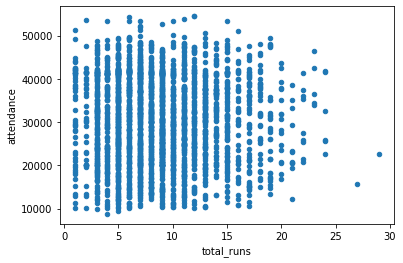

In [36]:
bb.plot.scatter(x = 'total_runs',y = 'attendance')

If there is an outlier, we may first want to verify that this value is correct, then we can decide whether or not to remove it.

*insert IQR outlier replacement formula*

## Distributions and associations

Prior to fitting a linear regression model, it can be important to inspect the distributions of quantitative features and investigate the relationships between features. We can visually inspect both of these by using a pair plot:

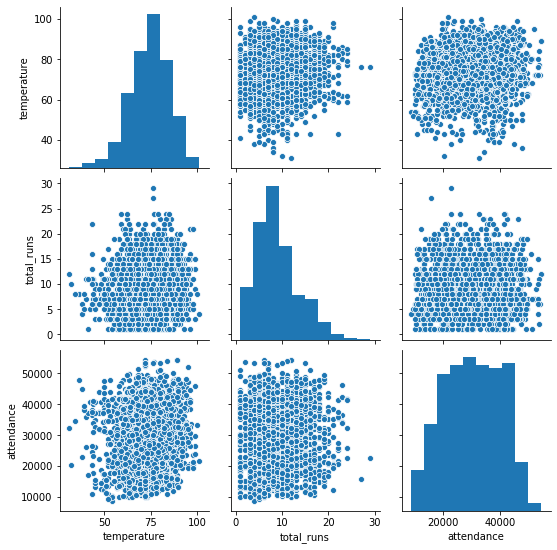

In [37]:
sns.pairplot(bb)

Looking at the histograms along the diagonal, total_runs appears to be somewhat right-skewed. This indicates that we may want to transform this feature to make it more normally distributed.<br>

We can explore the relationships between pairs of features by looking at the scatterplots off of the diagonal. This is useful for a few different reasons. For example, if we see non-linear associations between any of the predictors and the outcome variable, that might lead us to test out polynomial terms in our model. We can also get a sense for which features are most highly related to our outcome variable and check for collinearity. In this example, there appears to be a slight positive linear association between temperature and the total number of runs. We can further investigate this using a heat map of the correlation matrix:

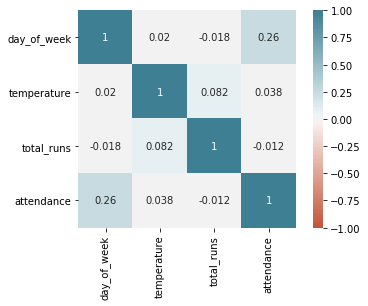

In [17]:
corr = bb.corr()
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

Similar to linear regression, some classification models assume no multicollinearity in the data, meaning that two highly correlated predictors should not be included in the model. We can check this assumption by looking at a correlation heat map. On the other hand, features that are highly correlated with our outcome variable are especially important to include in the model.

## Principal component analysis (PCA)

## Conclusion

Let’s review the ways we were able to explore this data set in preparation for a regression model:

- We previewed the first few rows of the data set using the .head() method.
- We checked the data type of each variable in the data set using .dtypes and corrected variables with incorrect data types.
- We investigated our categorical data to inform categorical encoding
- We investigated the scale of our quantitative variables and considered whether standardizing/scaling might be appropriate
- We investigated missing data
- We checked for outliers
- We inspected the distributions of our quantitative variables
- We looked at the relationships between pairs of features using both scatter plots and box plots